# 01 - General Instructions

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/xxx/main/content/init.py
import init; init.init(force_download=False); 


## 1. Repository layout

There are two top level folders <b><tt>content</tt></b> and <b><tt>admin</tt></b>.

### The  <b><tt>content</tt></b> folder

All publishable materials are to placed under content. This includes mostly:
- Notebooks with course content, explanations, code, etc. regularly used to support your lectures.
- Notebooks with **LABS**, containing algorithmic exercises for students to complete. 
- Resources required by any notebook, such as custom libraries, images, data files, etc.

You can name your notebooks as you want. We suggest to use the following convention:

- <b><tt>NOTES - *.ipynb</tt></b> for notebooks with course content (such as this one)
- <b><tt>LAB - *.ipynb</tt></b> for notebooks with labs.

All other resources (libs, images, files, etc.) are to be place under the <b><tt>content/local</tt></b> folder with the standard organization (<b><tt>lib</tt></b>, <b><tt>imgs</tt></b>, <b><tt>data</tt></b>, etc.). Observe the following examples.




In [4]:
# importing a local lib
from local.lib import mylib
mylib.do_something(3)

a random number 2.05


2.05442021141063

In [5]:
# using local data
import pandas as pd
x = pd.read_csv("local/data/trilotropicos.csv")
x.head()

length  width  label
0    3.20   3.01      0
1    3.42   2.66      1
2    3.75   2.92      1
3    2.97   3.38      0
4    3.63   2.35      1

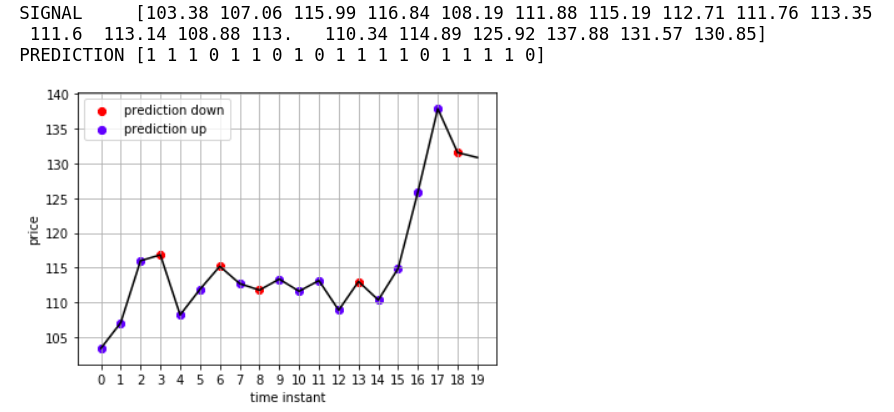

In [13]:
# the recommended way to show local images is with IPython.display rather than inline within markdown
# this ensures they will be shown corrctly in different platforms (colab, binder, github, etc.)
from IPython import display
display.Image("local/imgs/timeseries-prediction.png", width=500)

## 2. LABS and autograders

LABS notebooks are special in that:
    
- they are named `*--XX-TEACHER--XX.ipynb` and contain BOTH the student exercises and the graders the teacher develops.
- when ready, a <b>student version</b> is generated that strips out graders and teacher code.
- <b>ONLY</b> this student version is published.

See `LAB 01 - SUBMISSION EXAMPLE--XX--TEACHER--XX.ipynb` for instructions

## 3. Publishing

This repository is organized to be published in [<tt>github</tt>](www.github.com>) with automatic [<tt>Jupyter book</tt>](https://jupyterbook.org/) rendering, and configured to open notebooks in Google Colab. As an example, see our AI course which is structured this way:

- https://github.com/rramosp/20201.xai4eng the github repository with a structure similar to this one 
- https://rramosp.github.io/20201.xai4eng the Jupyter Book version automatically rendererd by github

### What you must know

- course contents are published in github. You may choose what level of privacy you want for your repository with the standard github configuration options.
- the top level `.gitignore` ensures the `admin` folder and any notebook named `*--XX-TEACHER--XX.ipynb` are not published.
- the top level `_toc.yml` and `_config.yml` configure the appearance and structure of jupyter book
- the top level `.github\workflows\book.html` controls de automatic generation of the `Jupyter Book` version by github. You should not need to touch this fuile.
- the code at the beginning of each notebook must **ALWAYS** be executed and ensures that libs and local resources are available in whatever execution environment the notebook is running.

### What you must do

- Create your course materials as notebooks and supporting resources (imgs, libs, etc.)
- Create your graders for the LABS (see `LAB 01 - SUBMISSION EXAMPLE--XX--TEACHER--XX.ipynb` for instructions)
- Organize the way you want to structure and navigate your course in `_toc.yml`. You can include `.md` files additionally and refer to them in `_toc.yml`
- **KEEP A COPY** of the labs notebook with your grades (ending in `--XX--TEACHER--XX.ipynb`) and the `admin` folder, as they are the **ONLY ITEMS** which are not persisted in github.

## 4. General remarks for LABS and graders

- Each LAB notebook may contain several tasks (exercises)


- Each task can be of one of two types:
    - **Grader by value**: The student must supply a value after he does a calculation. See Ejercicio 1 below.
    - **Grader by function**: The student must supply a function implementation. See Ejercicio 2 below.
  
  
- You must develop a **grader function** that, whenever executed returns a tuple `(grade, message)`
    - See both examples how to access the student supplied value or function
    

- Observe that, for each task, you must define: 
    - the cells for the student with instructions, template code and submission cell
    - a set of cell with the grader function, testing code, and registering the grader with the platform


- The following comments as first line of each cell have special meaning:
    - `## TEACHER DEFINEGRADER`    ::   this cell must contain the grader function. These cells will be removed when creating the student publishable notebook.
    - `## TEACHER SETGRADER` :: this cell must contain the code to register your grader with the platform. These cells will be removed when creating the student publishable notebook. 
    - `## TEACHER` :: cells with this comment can contain any code, and it will be removed when creating the student publishable notebook.
    - `## KEEPOUTPUT` :: cells with this comment will be KEPT in the student version, but their OUTPUT will be removed.
    

## 5. To create the publishable student version of a LAB notebook

- The cells at the end will create the student version of the notebook when executed.
- The notebook will have the same name with the `--XX--TEACHER--XX` suffix removed.
- All teacher cells will be removed as specified above.
